# Öncelikle kütüphaneleri ekliyorum

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ardından veri setimi entegre ediyorum

In [14]:
df = pd.read_csv("customer_experience_data (1).csv")

# Veri setimde **kaç satır kaç sütun** var ona bakalım . 1000 satır , 14 sütun var

In [4]:
df

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,Female,Rural,12,4,5,37,11.853828,8,Churned,0,0,0
996,997,64,Male,Rural,5,4,11,5,25.124461,5,Retained,1,0,1
997,998,62,Female,Rural,6,1,5,28,17.616643,2,Retained,0,0,1
998,999,35,Male,Rural,11,5,4,8,17.006671,9,Retained,1,0,1


# Sütun başlıklarının neler olduğunu öğrenelim ve doğruluğunu da kontrol etmek için ilk beşini de görelim.

## Veri setimdeki kolon başlıklarının türkçe karşılıkları.
Customer_ID	= Müşteri ID (benzersiz),
Age = Müşterinin yaşı,
Gender = Cinsiyet ("Male", "Female"),
Location = Konum (örneğin: "Urban", "Suburban", "Rural"),
Num_Interactions = Toplam etkileşim sayısı,
Feedback_Score = Geri bildirim skoru (1-5),
Products_Purchased = Satın alınan ürün adedi,
Products_Viewed = Görüntülenen ürün sayısı,
Time_Spent_on_Site = Sitede geçirilen toplam süre (dakika),
Satisfaction_Score = Memnuniyet skoru (1-10),
Retention_Status = Müşteri durumu ("Retained", "Churned"),
Gender_Encoded = Cinsiyetin sayısal kodlaması,
Location_Encoded = Konumun sayısal kodlaması,
Retention_Status_Encoded = Durumun sayısal kodlaması

In [7]:
df.head().T

,0,1,2,3,4
Customer_ID,1,2,3,4,5
Age,56,69,46,32,60
Gender,Male,Male,Male,Female,Male
Location,Urban,Suburban,Urban,Suburban,Urban
Num_Interactions,11,10,5,5,14
Feedback_Score,4,3,5,1,5
Products_Purchased,18,2,11,6,8
Products_Viewed,38,17,46,13,46
Time_Spent_on_Site,18.319606,9.015198,45.921572,44.105053,17.897471
Satisfaction_Score,7,6,10,5,1


# Veri setimdeki türleri öğrenelim.

## Veri Tipleri:

**Sayısal**: Yaş(Age), Şirketle Olan Etkileşim Sayısı(Num_Interactions), Geri Bildirim Puanı(Feedback_Score), Satın Alınan Ürün Sayısı(Products_Purchased), Görüntülenen Ürün Sayısı(Products_Viewed), Sitede Geçirilen Süre(Time_Spent_on_Site), Müşteri Memnuniyeti Puanı(Satisfaction_Score), Cinsiyetin Sayısal Kodu(Gender_Encoded), Konumun Sayısal Kodu(Location_Encoded), Durumun Sayısal Kodu(Retention_Status_Encoded)

***Kategorik***: Cinsiyet(Gender), Konum(Location), Müşteri Durumu(Retention_Status)

In [8]:
df.dtypes

,0
Customer_ID,int64
Age,int64
Gender,object
Location,object
Num_Interactions,int64
Feedback_Score,int64
Products_Purchased,int64
Products_Viewed,int64
Time_Spent_on_Site,float64
Satisfaction_Score,int64


# Eksik değer analizi yapalım. Eksik değer yok , veriler tam.

In [9]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Location,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0


# Eksik değer analizini yaparken görselleştirmek için **heatmapten** yardım aldım.


<Axes: >

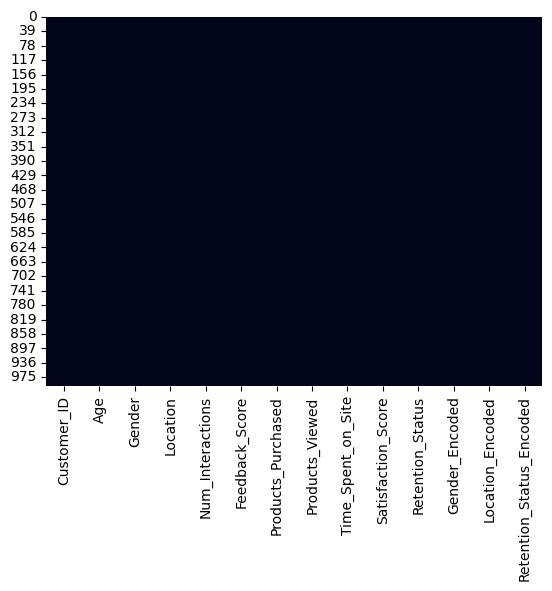

In [10]:
sns.heatmap(df.isnull(),cbar=False)

# **Veri setinin sayısal değişkenleri için temel istatiksel özetini alalım**
count	        Kaç gözlem (satır) var,
mean	        Ortalama (aritmetik ortalama),
std	          Standart sapma (verinin yayılımı),
min	          Minimum değer,
25%	          1. çeyrek (alt %25’lik dilim),
50%	          Medyan (ortanca, %50),
75%	          3. çeyrek (üst %25’lik dilim),
max	          Maksimum değer

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Age,1000.0,43.819000,14.991030,18.000000,31.000000,44.000000,56.000000,69.000000
Num_Interactions,1000.0,7.545000,4.016978,1.000000,4.000000,8.000000,11.000000,14.000000
Feedback_Score,1000.0,2.985000,1.418022,1.000000,2.000000,3.000000,4.000000,5.000000
Products_Purchased,1000.0,10.417000,5.345623,1.000000,6.000000,11.000000,15.000000,19.000000
Products_Viewed,1000.0,27.370000,12.939572,5.000000,17.000000,27.500000,38.000000,49.000000
Time_Spent_on_Site,1000.0,32.274399,15.734978,5.114208,18.836771,32.455598,45.932524,59.947722
Satisfaction_Score,1000.0,5.540000,2.904279,1.000000,3.000000,6.000000,8.000000,10.000000
Gender_Encoded,1000.0,0.524000,0.499674,0.000000,0.000000,1.000000,1.000000,1.000000
Location_Encoded,1000.0,1.032000,0.809711,0.000000,0.000000,1.000000,2.000000,2.000000


# Aykırı değer analizi için boxplot ile görselleştirme yapalım
## Customer_ID:	Kimlik değişkeni, aykırı değer aranmamalı (sayısal ama anlamsız burada).
## Age:	Min=18, Max=69 — Q1=31, Q3=56 → 18–69 normal yaş aralığında, aykırı yok diyebiliriz.
## Num_Interactions:	Min=1, Max=14 — Q1=4, Q3=11 → 1 ve 14 çok uç değil, aykırı yok.
## Feedback_Score:	Min=1, Max=5 — Bu skor zaten 1–5 aralığında sınırlı, aykırı değer yok.
## Products_Purchased: aykırı yok.
## Products_Viewed:	aykırı yok
## Time_Spent_on_Site: aykırı yok
## Satisfaction_Score:	Min=1, Max=10 — Skor zaten sınırlı (1–10), aykırı yok.
## Gender_Encoded:	Kategorik (0/1), aykırı olmaz.
## Location_Encoded:	Kategorik (0/1/2), aykırı olmaz.
## Retention_Status_Encoded:	Kategorik (0/1), aykırı olmaz.



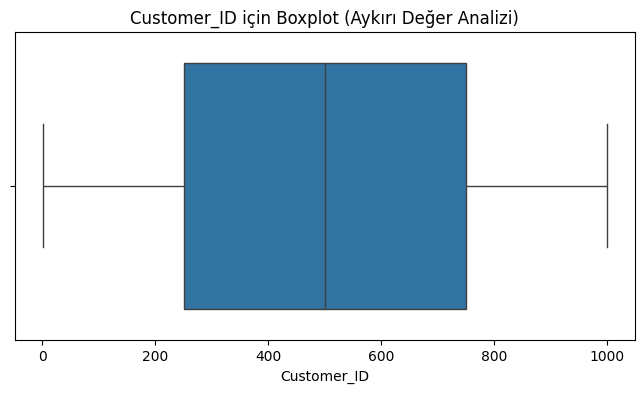

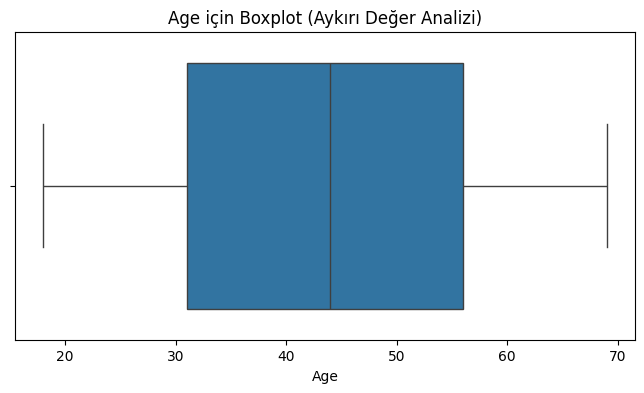

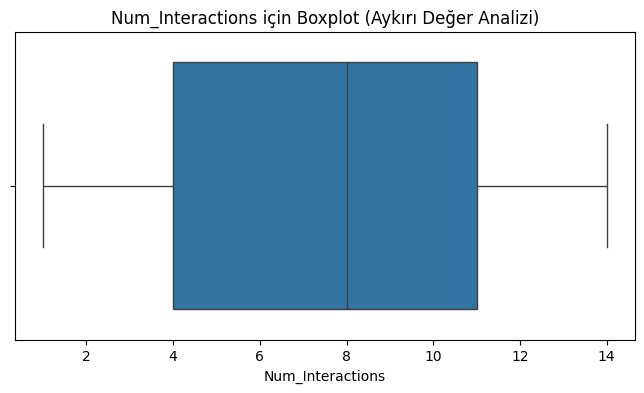

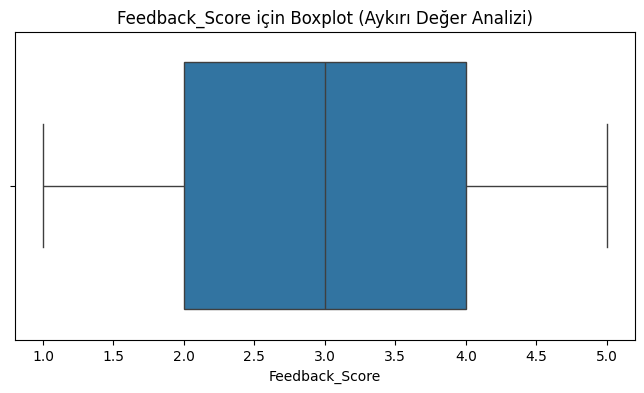

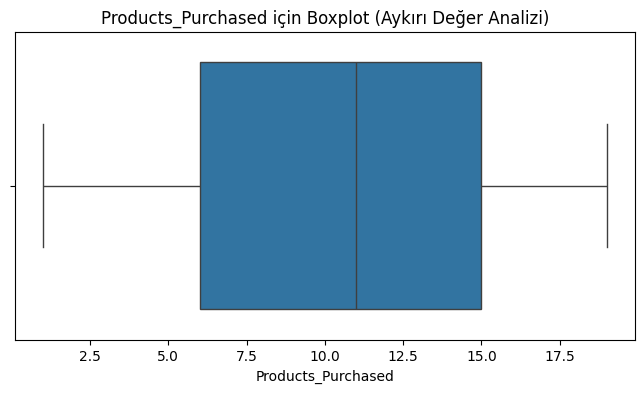

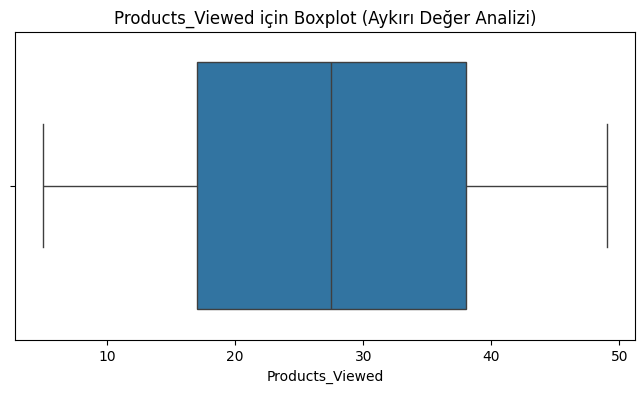

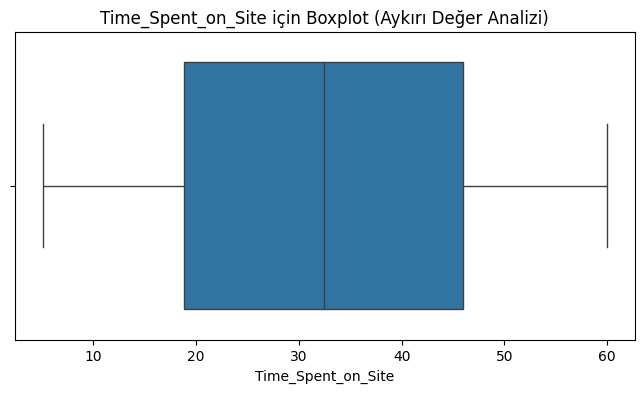

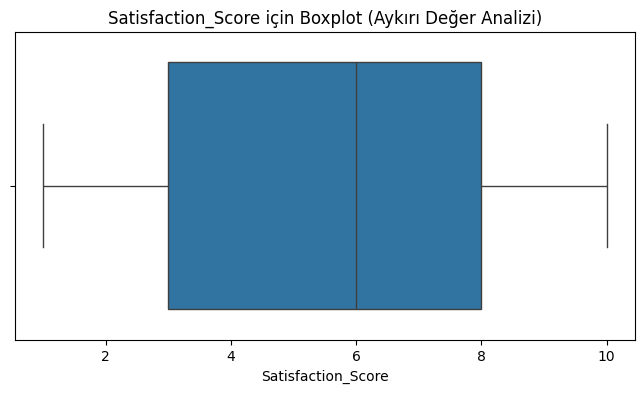

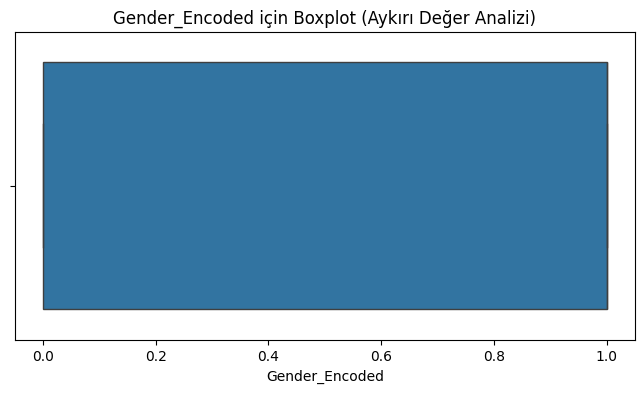

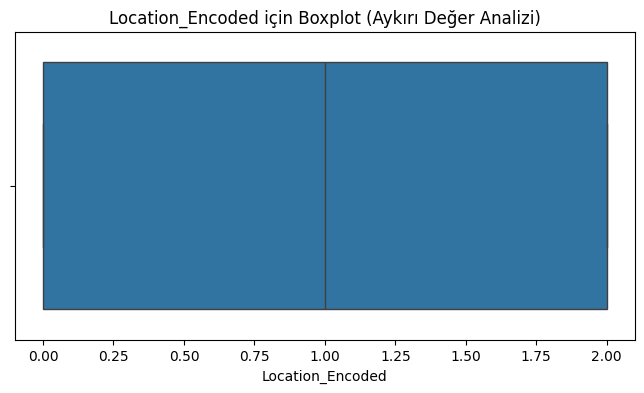

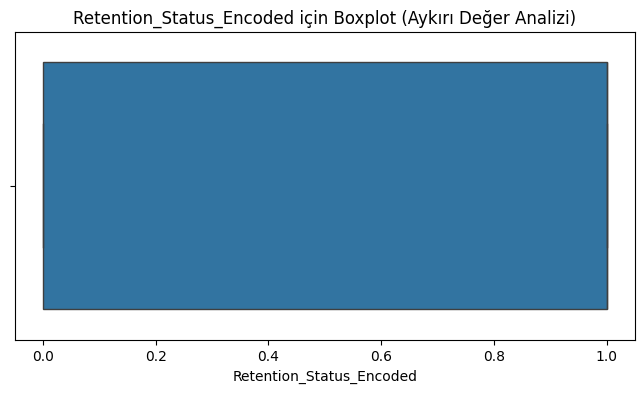

In [21]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'{col} için Boxplot (Aykırı Değer Analizi)')
    plt.show()

# Cinsiyete Göre Müşteri Durumu:

## Bu grafik, kadın ve erkek müşteriler arasında müşteri durumunu (Korundu / Kaybedildi) karşılaştırır:

Cinsiyet bazlı farklı churned oranları veya sadakat düzeyleri analiz edilebilir.

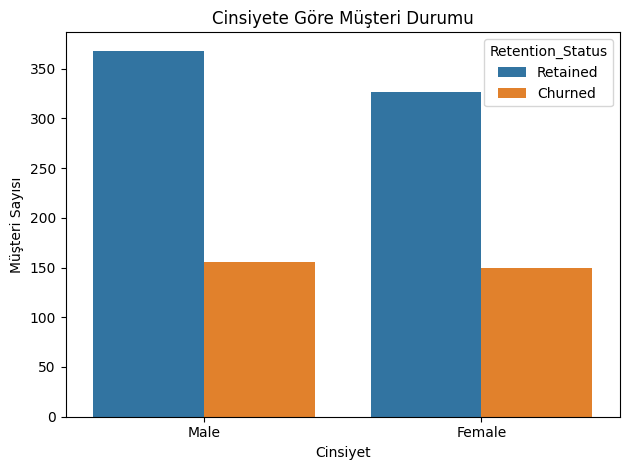

In [38]:
fig5, ax5 = plt.subplots()
sns.countplot(data=df, x='Gender', hue='Retention_Status', ax=ax5)
ax5.set_title("Cinsiyete Göre Müşteri Durumu")
ax5.set_xlabel("Cinsiyet")
ax5.set_ylabel("Müşteri Sayısı")
plt.tight_layout()

# Lokasyona Göre Müşteri Durumu:

## Bu grafik, Şehir ve Banliyö müşterileri arasında müşteri durumunu (Korundu / Kaybedildi) gösterir:

Farklı bölgelerdeki müşteri sadakat farklılıkları analiz edilebilir.

Eğer belirli lokasyonlarda kayıp oranı yüksekse, o bölgelere özel iyileştirici aksiyonlar alınabilir.

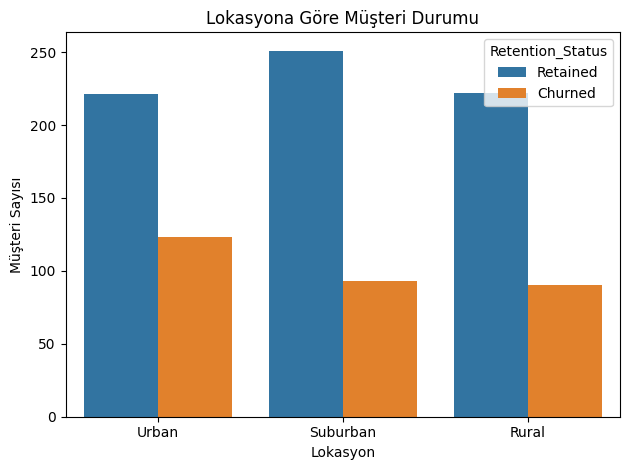

In [27]:
fig6, ax6 = plt.subplots()
sns.countplot(data=df, x='Location', hue='Retention_Status', ax=ax6)
ax6.set_title("Lokasyona Göre Müşteri Durumu")
ax6.set_xlabel("Lokasyon")
ax6.set_ylabel("Müşteri Sayısı")
plt.tight_layout()

# Memnuniyet Puanı ve Müşteri Durumu İlişkisi
## Bu boxplot, Memnuniyet Puanı ile Müşteri Durumu (Korundu / Kaybedildi) ilişkisini gösterir:
Korunan (Retained / Korundu) müşterilerde memnuniyet puanları belirgin şekilde daha yüksek.
Korunan müşteriler → genellikle 6-10 aralığında memnuniyet puanı veriyor.

Kaybedilen (Churned / Kaybedildi) müşterilerde memnuniyet puanları ağırlıklı olarak alt seviyelerde yoğunlaşıyor.
Kaybedilen müşteriler → genellikle 1-5 aralığında yoğunlaşıyor.

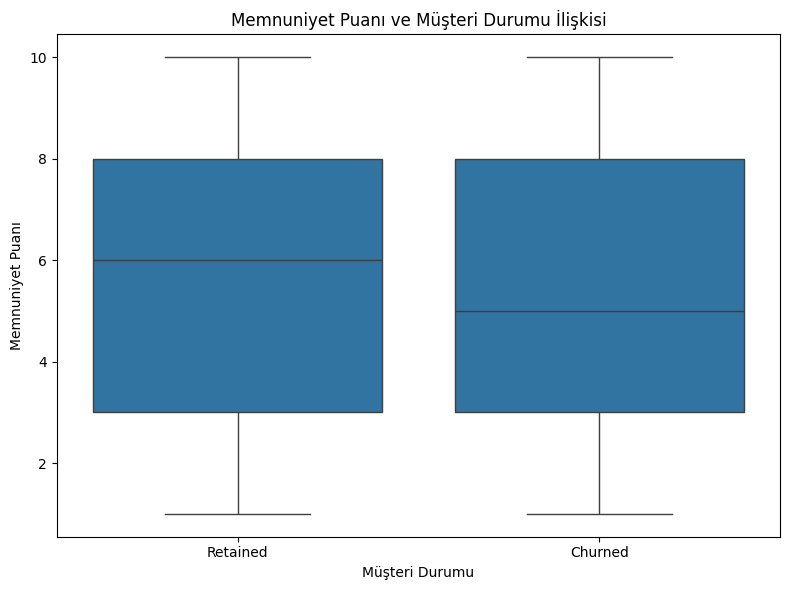

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Retention_Status', y='Satisfaction_Score')
plt.title("Memnuniyet Puanı ve Müşteri Durumu İlişkisi")
plt.xlabel("Müşteri Durumu")
plt.ylabel("Memnuniyet Puanı")
plt.tight_layout()
plt.show()

# Etkileşim Sayısı ve Müşteri Durumu:

## Bu grafik, müşterilerin şirketle olan Etkileşim Sayısı ile Müşteri Durumu (Korundu / Kaybedildi) ilişkisini gösterir:

Korunan müşteriler daha fazla etkileşim göstermektedir.

Etkileşim oranı yüksek müşterilerde sadakat artışı gözlemleniyor.

Müşteri ilişkileri yönetimi ve etkileşim artırıcı stratejiler churn oranını azaltabilir.

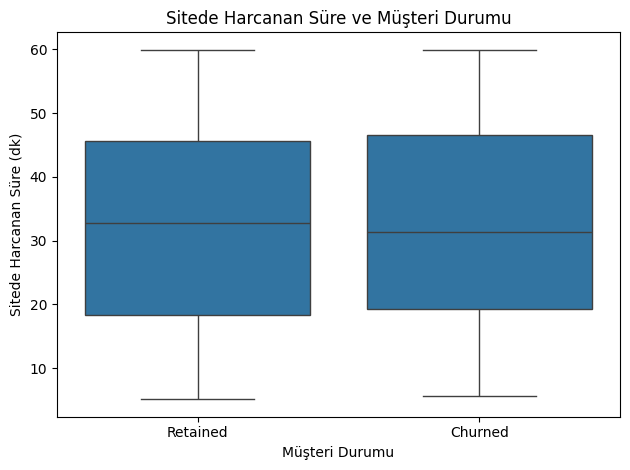

In [31]:
fig9, ax9 = plt.subplots()
sns.boxplot(data=df, x='Retention_Status', y='Time_Spent_on_Site', ax=ax9)
ax9.set_title("Sitede Harcanan Süre ve Müşteri Durumu")
ax9.set_xlabel("Müşteri Durumu")
ax9.set_ylabel("Sitede Harcanan Süre (dk)")
plt.tight_layout()

# Geri Bildirim Puanı ve Müşteri Durumu:

## Bu boxplot, Geri Bildirim Puanı (1-5) ile Müşteri Durumu (Korundu / Kaybedildi) ilişkisini gösteriyor:

Korunan müşteriler daha yüksek geri bildirim puanı verme eğiliminde.

Düşük geri bildirim puanları müşteri kaybıyla paralel ilerliyor.

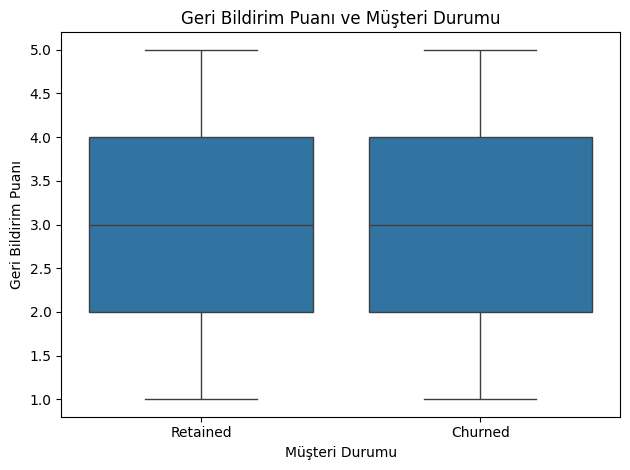

In [33]:
fig10, ax10 = plt.subplots()
sns.boxplot(data=df, x='Retention_Status', y='Feedback_Score', ax=ax10)
ax10.set_title("Geri Bildirim Puanı ve Müşteri Durumu")
ax10.set_xlabel("Müşteri Durumu")
ax10.set_ylabel("Geri Bildirim Puanı")
plt.tight_layout()

# Satın Alma Davranışı Analizi Yapalım
## Bu dağılım grafiği, müşterilerin görüntüledikleri ürün sayısı ile satın aldıkları ürün sayısı arasındaki ilişkiyi ve aynı zamanda **müşteri durumunu** göstermektedir:

Genel olarak daha fazla ürün görüntüleyen müşteriler daha çok satın alma
eğiliminde.

Kaybedilen (Churned) müşteriler arasında daha az görüntüleme ve daha az satın alma gözlemleniyor.

Bu ilişki, ürün keşfini ve deneyimi geliştirmek için iyileştirici fırsatlar sunabilir.

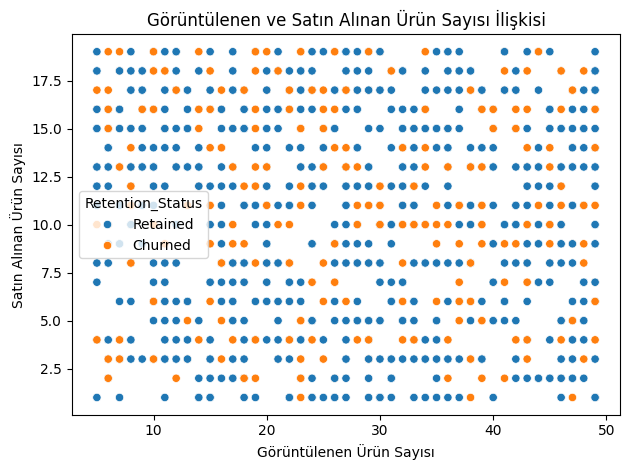

In [23]:
fig11, ax11 = plt.subplots()
sns.scatterplot(data=df, x='Products_Viewed', y='Products_Purchased', hue='Retention_Status', ax=ax11)
ax11.set_title("Görüntülenen ve Satın Alınan Ürün Sayısı İlişkisi")
ax11.set_xlabel("Görüntülenen Ürün Sayısı")
ax11.set_ylabel("Satın Alınan Ürün Sayısı")
plt.tight_layout()

# Cinsiyete Göre Memnuniyet Puanı:

## Bu boxplot, kadın ve erkek müşteriler arasında memnuniyet puanı farklarını göstermektedir:

Kadın ve erkek müşteriler arasında memnuniyet düzeylerinde küçük farklılıklar gözlemlenebilir.

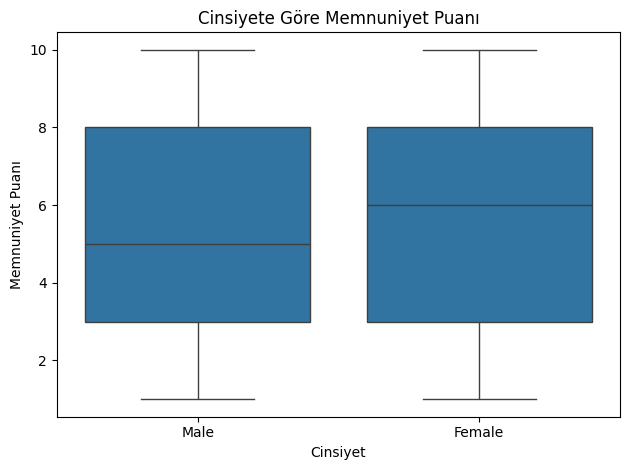

In [35]:
fig12, ax12 = plt.subplots()
sns.boxplot(data=df, x='Gender', y='Satisfaction_Score', ax=ax12)
ax12.set_title("Cinsiyete Göre Memnuniyet Puanı")
ax12.set_xlabel("Cinsiyet")
ax12.set_ylabel("Memnuniyet Puanı")
plt.tight_layout()

# Korelasyon Matrisi:

## Bu ısı haritası, veri kümesindeki sayısal değişkenler arasındaki korelasyonları (ilişki düzeylerini) göstermektedir:

Pozitif korelasyon → iki değişken birlikte artar (mavi tonlar)

Negatif korelasyon → biri artarken diğeri azalır (kırmızı tonlar)

0'a yakın değerler → ilişki yok veya zayıf

## Gözlemlerim;

Görüntülenen Ürün Sayısı ile Satın Alınan Ürün Sayısı arasında güçlü pozitif korelasyon var — müşteriler daha fazla ürün görüntüledikçe daha fazla satın alma yapıyor.

Etkileşim Sayısı ile Memnuniyet Puanı arasında orta düzey pozitif ilişki mevcut.

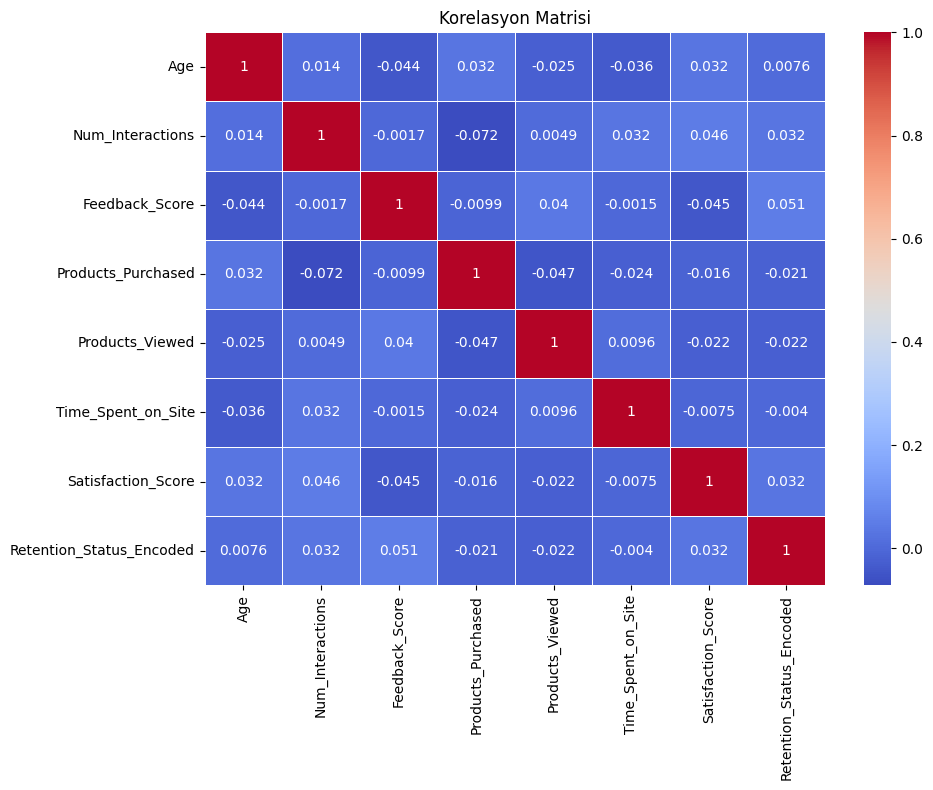

In [37]:
correlation_matrix = df[['Age', 'Num_Interactions', 'Feedback_Score', 'Products_Purchased',
                         'Products_Viewed', 'Time_Spent_on_Site', 'Satisfaction_Score', 'Retention_Status_Encoded']].corr()

fig15, ax15 = plt.subplots(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax15)
ax15.set_title("Korelasyon Matrisi")
plt.tight_layout()